In [338]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [339]:
# change to True to introduce market crash from covid
COVID = False

symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "NVDA", "TSLA", "BRK-B", "JPM", "V", "JNJ", "WMT", "PG", "MA", "UNH"]
start_date = "2019-1-1" if COVID else "2022-01-01"
end_date = "2026-01-01"

price_history = yf.download(symbols, start=start_date, end=end_date)['Close']
price_history.head()

[*********************100%***********************]  15 of 15 completed


Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,,
2022-01-03,178.103653,170.404495,300.790009,143.904221,152.576859,144.929520,361.819183,336.191620,323.898376,30.062769,146.320908,399.926666,469.479889,214.413986,45.765415
2022-01-04,175.843262,167.522003,308.529999,143.316635,152.167740,150.423721,366.149902,334.195526,318.344452,29.233374,146.832855,383.196655,458.843109,215.411392,44.926991
2022-01-05,171.165833,164.356995,309.920013,136.741837,153.181702,147.673691,364.696594,321.921326,306.123901,27.550627,147.497589,362.706665,457.712067,213.029312,45.534443
2022-01-06,168.308472,163.253998,313.220001,136.714523,152.656921,149.242569,361.366211,330.153748,303.704926,28.123522,146.257996,354.899994,438.980652,212.787216,45.407898
2022-01-07,168.474838,162.554001,319.779999,135.989502,154.720444,150.721298,361.024261,329.488403,303.859711,27.194324,146.177170,342.320007,428.652344,210.085617,45.841343


In [340]:
# toggle for testing
use_geometric = True

if use_geometric:
    # log/geometric returns (eliminates upward bias)
    periodic_daily_returns = np.log(price_history / price_history.shift(1)).dropna()
    cov_matrix = periodic_daily_returns.cov()
    daily_variance = np.diag(cov_matrix.values)
    avg_returns = periodic_daily_returns.mean() - (daily_variance / 2)
else:
    # simple/arithmetic returns (upward bias)
    periodic_daily_returns = price_history.pct_change().dropna()
    avg_returns = periodic_daily_returns.mean()

cov_matrix = periodic_daily_returns.cov()
corr_matrix = periodic_daily_returns.corr()

print('-' * 35)
print(f'⚠️ NOTE: using {'GEOMETRIC' if use_geometric else 'ARITHMETIC'} returns')
print('-' * 35)
print('Average daily returns (drift):')
display(avg_returns)
print('Covariance matrix:')
display(cov_matrix)
print('Correlation matrix:')
display(corr_matrix)

-----------------------------------
⚠️ NOTE: using GEOMETRIC returns
-----------------------------------
Average daily returns (drift):


Ticker
AAPL     0.000261
AMZN     0.000026
BRK-B    0.000450
GOOGL    0.000564
JNJ      0.000245
JPM      0.000670
MA       0.000349
META     0.000239
MSFT     0.000258
NVDA     0.001254
PG      -0.000092
TSLA    -0.000637
UNH     -0.000562
V        0.000391
WMT      0.000793
dtype: float64

Covariance matrix:


Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT
Ticker,,,,,,,,,,,,,,,
AAPL,0.000320,0.000236,0.000097,0.000215,3.019764e-05,0.000111,0.000146,2.553016e-04,0.000189,0.000312,0.000055,0.000353,0.000049,0.000133,0.000072
AMZN,0.000236,0.000554,0.000100,0.000303,3.776258e-06,0.000145,0.000161,4.198357e-04,0.000265,0.000447,0.000026,0.000426,0.000043,0.000143,0.000084
BRK-B,0.000097,0.000100,0.000124,0.000081,4.723054e-05,0.000109,0.000096,1.000243e-04,0.000075,0.000105,0.000047,0.000124,0.000054,0.000090,0.000050
GOOGL,0.000215,0.000303,0.000081,0.000422,1.235062e-05,0.000111,0.000131,3.366217e-04,0.000219,0.000370,0.000025,0.000350,0.000044,0.000117,0.000054
JNJ,0.000030,0.000004,0.000047,0.000012,1.179765e-04,0.000037,0.000037,2.280534e-07,0.000010,-0.000042,0.000053,-0.000003,0.000050,0.000039,0.000031
JPM,0.000111,0.000145,0.000109,0.000111,3.689861e-05,0.000246,0.000118,1.449507e-04,0.000096,0.000190,0.000035,0.000213,0.000051,0.000113,0.000051
MA,0.000146,0.000161,0.000096,0.000131,3.745341e-05,0.000118,0.000208,1.797544e-04,0.000130,0.000206,0.000058,0.000191,0.000057,0.000179,0.000061
META,0.000255,0.000420,0.000100,0.000337,2.280534e-07,0.000145,0.000180,8.689920e-04,0.000296,0.000498,0.000031,0.000402,0.000012,0.000152,0.000074
MSFT,0.000189,0.000265,0.000075,0.000219,1.019080e-05,0.000096,0.000130,2.958750e-04,0.000283,0.000362,0.000038,0.000281,0.000044,0.000114,0.000058


Correlation matrix:


Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT
Ticker,,,,,,,,,,,,,,,
AAPL,1.000000,0.561355,0.483853,0.584206,0.155364,0.395582,0.565454,0.483971,0.626463,0.518260,0.269344,0.507357,0.132460,0.531428,0.291003
AMZN,0.561355,1.000000,0.381748,0.626238,0.014775,0.391711,0.474456,0.605264,0.668911,0.563993,0.097836,0.465923,0.089119,0.432645,0.257947
BRK-B,0.483853,0.381748,1.000000,0.354144,0.389789,0.624341,0.593191,0.304160,0.396677,0.278589,0.373341,0.286791,0.236073,0.573881,0.324671
GOOGL,0.584206,0.626238,0.354144,1.000000,0.055328,0.345396,0.441374,0.555636,0.632680,0.534694,0.106240,0.438161,0.104076,0.406291,0.190522
JNJ,0.155364,0.014775,0.389789,0.055328,1.000000,0.216403,0.238806,0.000712,0.055726,-0.113616,0.434544,-0.007572,0.225296,0.253691,0.209649
JPM,0.395582,0.391711,0.624341,0.345396,0.216403,1.000000,0.519342,0.313230,0.361841,0.359624,0.195633,0.349068,0.159338,0.514264,0.234454
MA,0.565454,0.474456,0.593191,0.441374,0.238806,0.519342,1.000000,0.422303,0.533408,0.422743,0.356364,0.341209,0.193460,0.886286,0.306808
META,0.483971,0.605264,0.304160,0.555636,0.000712,0.313230,0.422303,1.000000,0.596142,0.501608,0.092412,0.351028,0.019145,0.368827,0.181919
MSFT,0.626463,0.668911,0.396677,0.632680,0.055726,0.361841,0.533408,0.596142,1.000000,0.638623,0.197272,0.429672,0.127833,0.482084,0.250187


In [341]:
# adjust simulation parameters
n_simulations = 1000
n_days = 252

# adjust weights here
portfolio_config = [
    {"symbol": "AAPL", "weight": 0.3},
    {"symbol": "AMZN", "weight": 0.},
    {"symbol": "BRK-B", "weight": 0.},
    {"symbol": "GOOGL", "weight": 0.},
    {"symbol": "JNJ", "weight": 0.1},
    {"symbol": "JPM", "weight": 0.},
    {"symbol": "MA", "weight": 0.},
    {"symbol": "META", "weight": 0.},
    {"symbol": "MSFT", "weight": 0.},
    {"symbol": "NVDA", "weight": 0.4},
    {"symbol": "PG", "weight": 0.},
    {"symbol": "TSLA", "weight": 0.},
    {"symbol": "UNH", "weight": 0.},
    {"symbol": "V", "weight": 0.2},
    {"symbol": "WMT", "weight": 0.},
]

symbols = [position['symbol'] for position in portfolio_config]
weights = np.array([position['weight'] for position in portfolio_config])

portfolio_valid = True
if not np.isclose(weights.sum(), 1.0):
    print(f'Weights must sum to 1.0 (current sum: {weights.sum()})')
    portfolio_valid = False

In [342]:
L = np.linalg.cholesky(cov_matrix)

# sim_multipliers:    (n_days+1, n_simulations) — cumulative portfolio growth paths, starts at 1.0
# sim_daily_returns:  (n_days,   n_simulations) — daily portfolio returns paths

sim_multipliers = np.zeros((n_days + 1, n_simulations))
sim_multipliers[0, :] = 1.0

sim_daily_returns = np.zeros((n_days, n_simulations))

for i in range(n_simulations):
    z_scores = np.random.normal(size=(n_days, len(symbols)))
    shocks = z_scores @ L.T
    asset_daily_returns = avg_returns.values + shocks
    portfolio_daily_returns = asset_daily_returns @ weights
    path = np.exp(portfolio_daily_returns.cumsum()) if use_geometric else (1 + portfolio_daily_returns).cumprod()
    sim_multipliers[1:, i] = path
    sim_daily_returns[:, i] = portfolio_daily_returns

In [343]:
def calculate_metrics(sim_multipliers, sim_daily_returns, initial_principle, use_geometric):
    
    terminal_multipliers = sim_multipliers[-1, :]
    terminal_values = terminal_multipliers * initial_principle
    
    median_terminal_multiplier = np.median(terminal_multipliers)
    median_terminal_value = np.median(terminal_values)

    n_days = sim_daily_returns.shape[0]
    years = n_days / 252

    # roi
    if use_geometric:
        annual_roi = np.log(median_terminal_multiplier) / years
    else:
        annual_roi = (median_terminal_multiplier ** (1 / years)) - 1

    # volatility
    annual_vol = np.std(sim_daily_returns) * np.sqrt(252)

    # sharpe
    risk_free_rate = 0.04
    sharpe = (annual_roi - risk_free_rate) / annual_vol

    # VaR
    var_95 = initial_principle - np.percentile(terminal_values, 5)
    var_99 = initial_principle - np.percentile(terminal_values, 1)

    return median_terminal_value, annual_roi, annual_vol, sharpe, var_95, var_99


Initial Principal:  $10,000.00
Portfolio Makeup:   4 asset(s)
-----------------------------------
 - AAPL   |   30.0%
 - JNJ    |   10.0%
 - NVDA   |   40.0%
 - V      |   20.0%
-----------------------------------
Median Value:            $12,065.07
Annual ROI:                 +18.77%
Annual Vol:                  29.30%
Sharpe Ratio:                  0.50
95% VaR:                  $2,447.94
99% VaR:                  $3,851.47


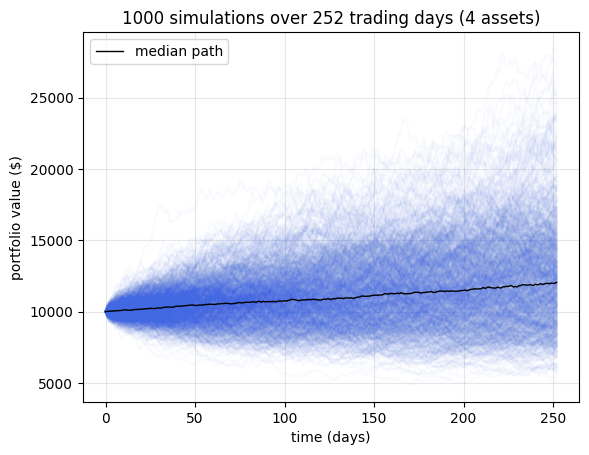

In [344]:
# adjust this
initial_principle = 10000
equity_curves = sim_multipliers * initial_principle

selected_symbols = [symbol for symbol in portfolio_config if symbol['weight'] > 0]

median_terminal_value, annual_roi, annual_vol, sharpe, var_95, var_99 = calculate_metrics(
    sim_multipliers, sim_daily_returns, initial_principle, use_geometric)

print(f"Initial Principal:  ${initial_principle:,.2f}")
print(f"Portfolio Makeup:   {len(selected_symbols)} asset(s)")
print("-" * 35)
for item in selected_symbols:
    print(f" - {item['symbol']:<6} | {item['weight']*100:>6.1f}%")
print("-" * 35)

display_width = 19
print(f"{'Median Value:':<15} {f'${median_terminal_value:,.2f}':>{display_width}}")
print(f"{'Annual ROI:':<15} {f'{annual_roi * 100:+.2f}%':>{display_width}}")
print(f"{'Annual Vol:':<15} {f'{annual_vol * 100:.2f}%':>{display_width}}")
print(f"{'Sharpe Ratio:':<15} {f'{sharpe:.2f}':>{display_width}}")
print(f"{'95% VaR:':<15} {f'${var_95:,.2f}':>{display_width}}")
print(f"{'99% VaR:':<15} {f'${var_99:,.2f}':>{display_width}}")

# visualize stuff
plt.plot(equity_curves, color='royalblue', alpha=0.03)
plt.plot(np.median(equity_curves, axis=1), color='black', linewidth=1, label="median path")
plt.title(f"{n_simulations} simulations over {n_days} trading days ({len(selected_symbols)} asset{'s' if len(selected_symbols) > 1 else ''})")
plt.xlabel("time (days)")
plt.ylabel("portfolio value ($)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()